In [145]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
#C:\Users\Naveen Voosala\Downloads\daily_min_temperatures.csv

In [ ]:
#C:\Users\Naveen Voosala\Downloads\daily_total_female_births.csv

# Time series analysis of daily_min_temperatures dataset:

In [2]:
import pandas as pd

In [63]:
tdf = pd.read_csv('C:/Users/Naveen Voosala/Downloads/daily_min_temperatures.csv')

In [4]:
fdf = pd.read_csv('C:/Users/Naveen Voosala/Downloads/daily_total_female_births.csv')

In [16]:
tdf.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [87]:
tdf.shape

(3650, 1)

In [17]:
tdf.dtypes

Date     object
Temp    float64
dtype: object

In [64]:
pd.to_datetime(['1981-01-01','test'], errors='coerce')


DatetimeIndex(['1981-01-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [61]:
import matplotlib.pyplot as plt

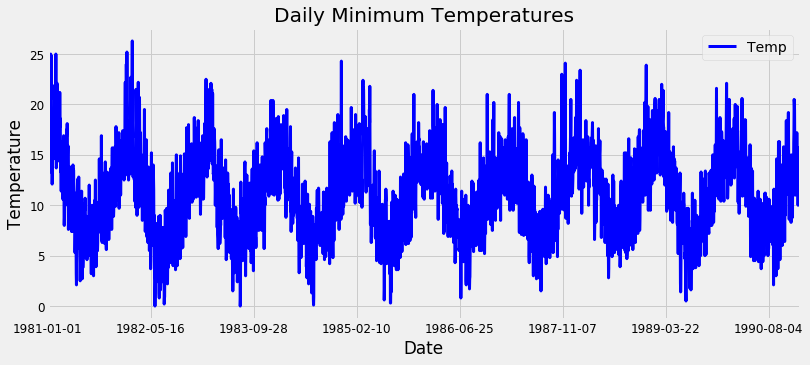

In [65]:
tdf = tdf.set_index('Date')
ax = tdf.plot(color='blue', figsize=(12, 5), fontsize=12,
linewidth=3)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Daily Minimum Temperatures')

plt.show()

The plot of the data of daily minimum temperatures show a stedy pattern or seasonality. overall, it does not show a very significant change in the trend. Let's look closely by decomposing it.  

In [9]:
tdf.isnull().sum()

Date    0
Temp    0
dtype: int64

## Time Siries Decomposition:

We can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

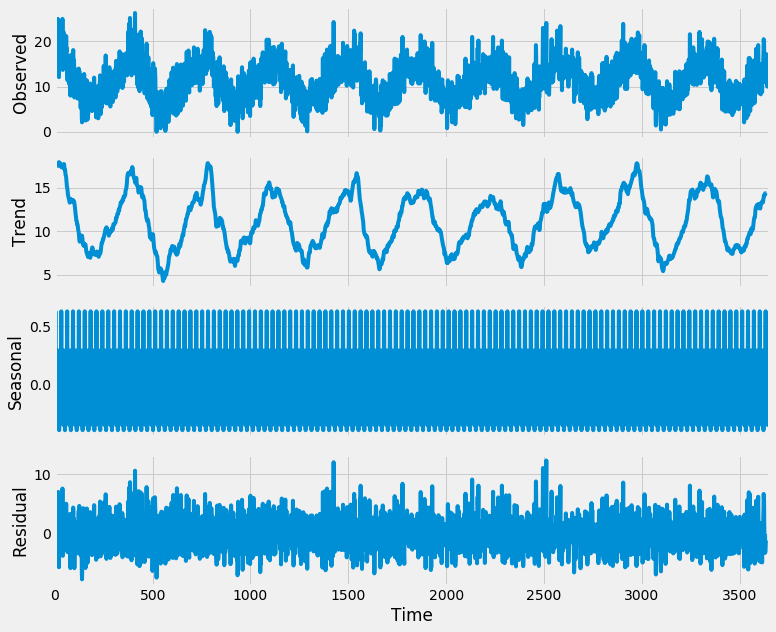

In [90]:
tdf.reset_index(inplace=True)
tdf['Date'] = pd.to_datetime(tdf['Date'])
tdf = tdf.set_index('Date')
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(tdf.Temp.values, freq=30)
fig = decomposition.plot()

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error
A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day. 
However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

In the above decomposition,there is a steady clear periodic pattern of temperature through the data, rising and fall each day. Clearly, the pattern repeats within a given year, every year. 
However, as years progress, the minimum temperature remains the same. 
We can also nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, you can do a month-wise boxplot to visualize the monthly distributions.

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, looks slightly random at almost regular intervals which is good. 

### Extracting components from time series decomposition

In [91]:
print(dir(decomposition))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend']


In [92]:
print(decomposition.seasonal)


[0.08041894 0.14594236 0.30218202 ... 0.28937211 0.18957872 0.24707183]


White noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.
In white noise there is no pattern whatsoever. If you consider the temperature in this time series, the blank between the peaks is the white noise. Infact, There is not much noise 

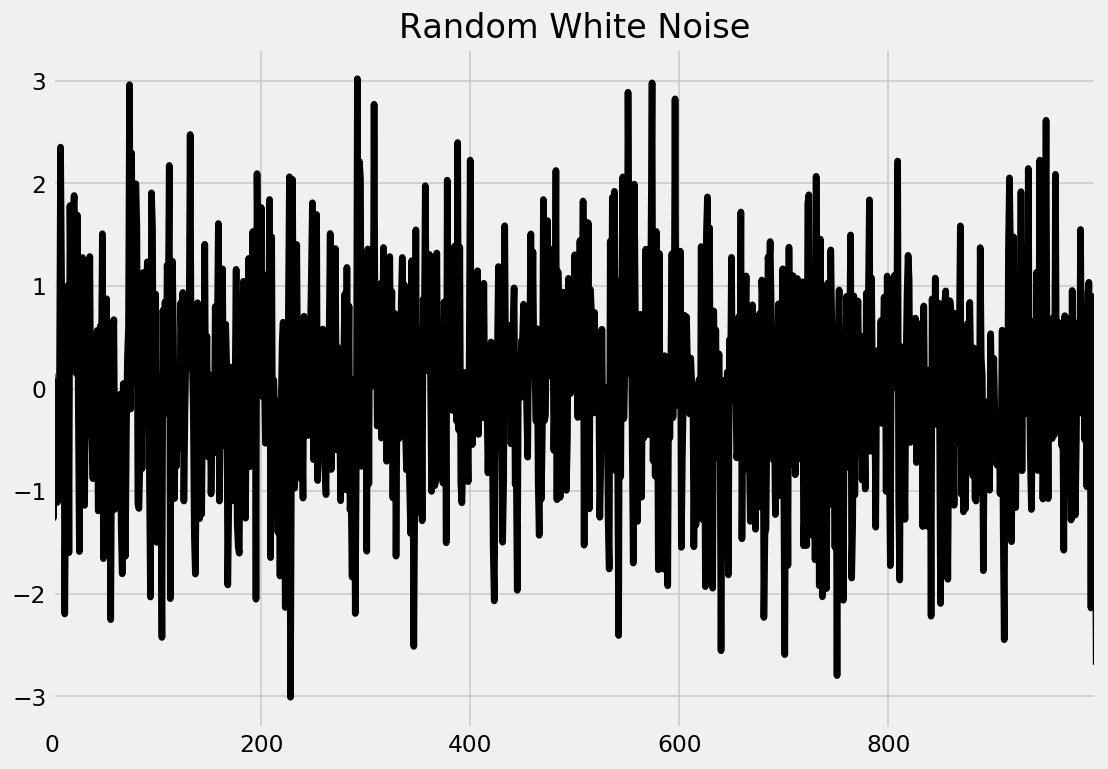

In [167]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

# Time series analysis of daily_total_female_births dataset:

In [69]:
fdf.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [70]:
fdf.dtypes

Date      object
Births     int64
dtype: object

In [71]:
pd.to_datetime(['1959-01-01','test'], errors='coerce')

DatetimeIndex(['1959-01-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [72]:
fdf.isnull().sum()

Date      0
Births    0
dtype: int64

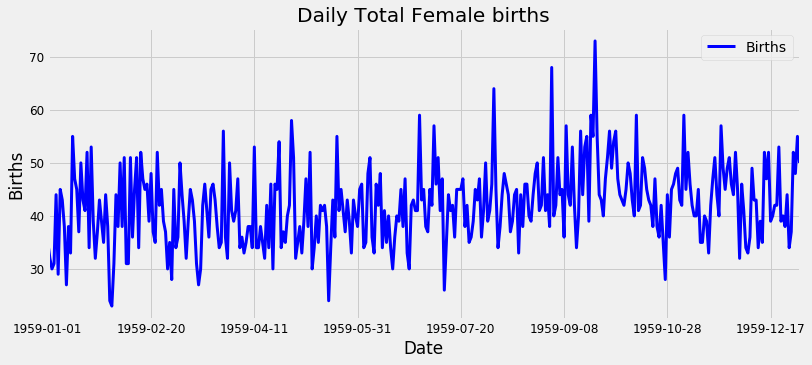

In [73]:
fdf = fdf.set_index('Date')
ax1 = fdf.plot(color='blue', figsize=(12, 5), fontsize=12,
linewidth=3)

ax1.set_xlabel('Date')
ax1.set_ylabel('Births')
ax1.set_title('Daily Total Female births')

plt.show()

The total female birth rate does show a bit of pattern but mostly irregular. It peaks the highest between the months September and October, and was the lowest in the month January. We can also see that there a slight upward trend through the year. There is a slight downward trend after october. Upon obsevation seems like there is bit of a noise or randomness in the data.

### Time Siries Decomposition:

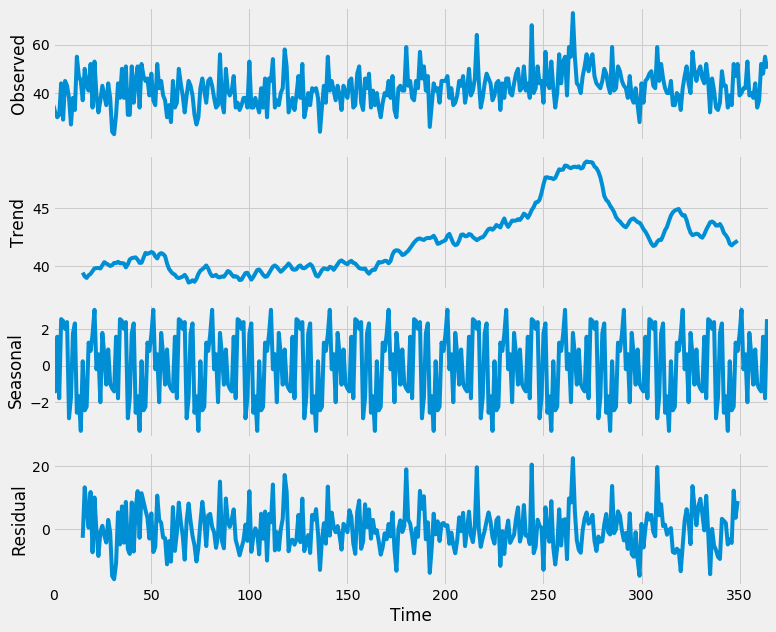

In [111]:
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(fdf.Births.values, freq=30)
fig = decomposition.plot()

the above decomposition of the female birth rate shows irregular patterns in the data, meaning to say the the rate of girls being born through the year is not constant. It's quite obvious that birthrate of any gender would be the same. 

We can observe a slight trend as the birth rate rises slowly from the months of February to September. As we go on the plot, we se a fall in the female birthrate. Overall, we see that birthnate has never been zero.

There is a bit of noise as we observe but not very marked. Mostly the noise increased after February and kept increasing.

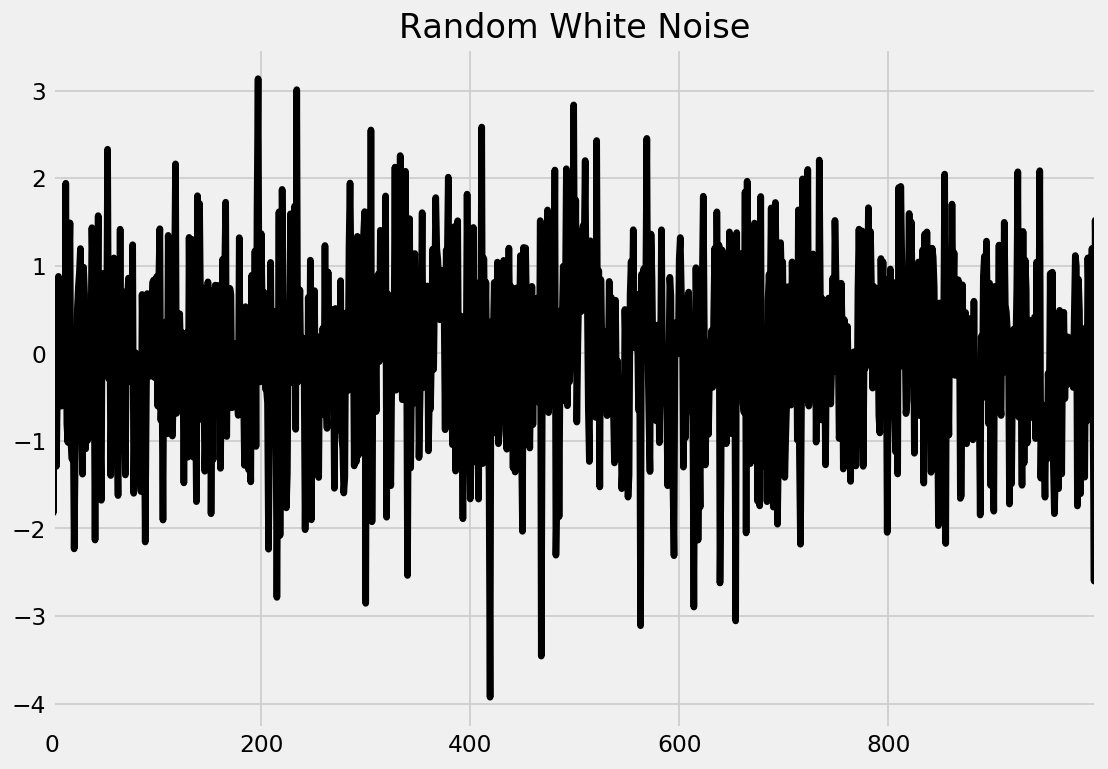

In [155]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')